https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr/notebook

In [2]:
import kagglehub
path1 = kagglehub.dataset_download("landlord/handwriting-recognition")
print("Path to 1st dataset files:", path1)
path2 = kagglehub.dataset_download("vaibhao/handwritten-characters")
print("Path to 2nd dataset files:", path2)

100%|██████████| 1.26G/1.26G [00:42<00:00, 31.6MB/s]

Extracting files...


Path to 1st dataset files: /root/.cache/kagglehub/datasets/landlord/handwriting-recognition/versions/1


100%|██████████| 1.62G/1.62G [00:55<00:00, 31.4MB/s]

Extracting files...


Path to 2nd dataset files: /root/.cache/kagglehub/datasets/vaibhao/handwritten-characters/versions/1


In [3]:
!pip install imutils

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [8]:
dir = "/root/.cache/kagglehub/datasets/vaibhao/handwritten-characters/versions/1/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [9]:
len(train_data)

140000

In [10]:
val_dir = "/root/.cache/kagglehub/datasets/vaibhao/handwritten-characters/versions/1/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [11]:
len(val_data)

15209

In [12]:
random.shuffle(train_data)
random.shuffle(val_data)

In [13]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [14]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [15]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [16]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [17]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [18]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [19]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,851 (636.14 KB)

 Trainable params: 162,851 (636.14 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [23]:
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 156s 35ms/step - accuracy: 0.6934 - loss: 1.0136 - val_accuracy: 0.8993 - val_loss: 0.3031
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 188s 32ms/step - accuracy: 0.8807 - loss: 0.3507 - val_accuracy: 0.8918 - val_loss: 0.2973
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 136s 31ms/step - accuracy: 0.8976 - loss: 0.2955 - val_accuracy: 0.9091 - val_loss: 0.2582
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 144s 32ms/step - accuracy: 0.9073 - loss: 0.2667 - val_accuracy: 0.9015 - val_loss: 0.2712
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 137s 31ms/step - accuracy: 0.9107 - loss: 0.2534 - val_accuracy: 0.9085 - val_loss: 0.2530
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 139s 30ms/step - accuracy: 0.9170 - loss: 0.2354 - val_accuracy: 0.9116 - val_loss: 0.2481
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 141s 30ms/step - accuracy: 0.9191 - loss: 0.2275 - val_accuracy: 0.9202 - val_loss: 0.2353
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 142s 30ms/step - accuracy: 

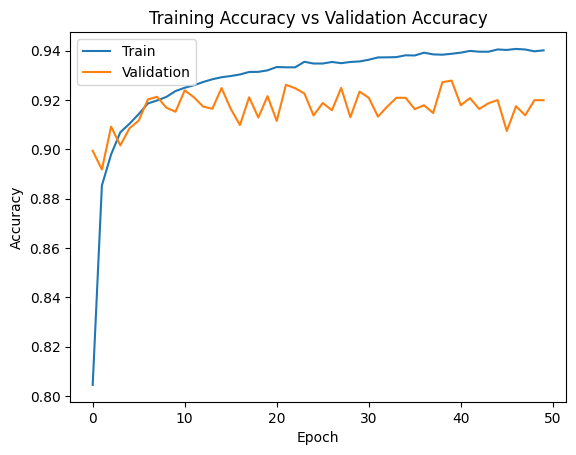

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

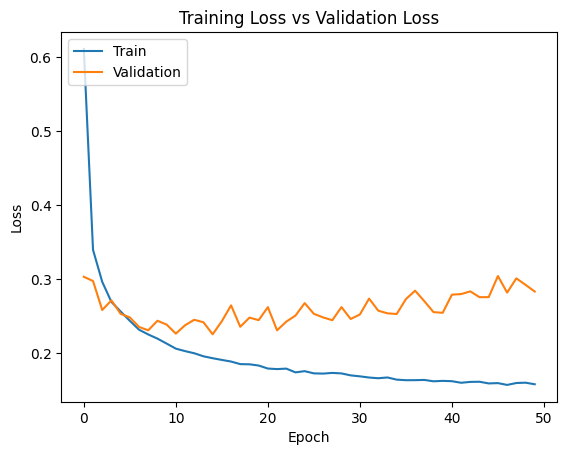

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

476/476 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       368
           1       0.92      0.77      0.84      1000
           2       0.98      0.91      0.94      1000
           3       1.00      0.98      0.99      1000
           4       0.99      0.97      0.98      1000
           5       0.99      0.95      0.97      1000
           6       0.98      0.96      0.97      1000
           7       0.92      0.98      0.95       190
           8       0.98      0.97      0.98      1000
           9       0.91      0.89      0.90      1000
           A       0.87      0.93      0.90       392
           B       0.91      0.94      0.92       385
           C       0.84      0.88      0.86       168
           D       0.98      0.93      0.95       322
           E       0.93      0.97      0.95       308
           F       0.95      0.97      0.96       324
           G       0.77      0.83     

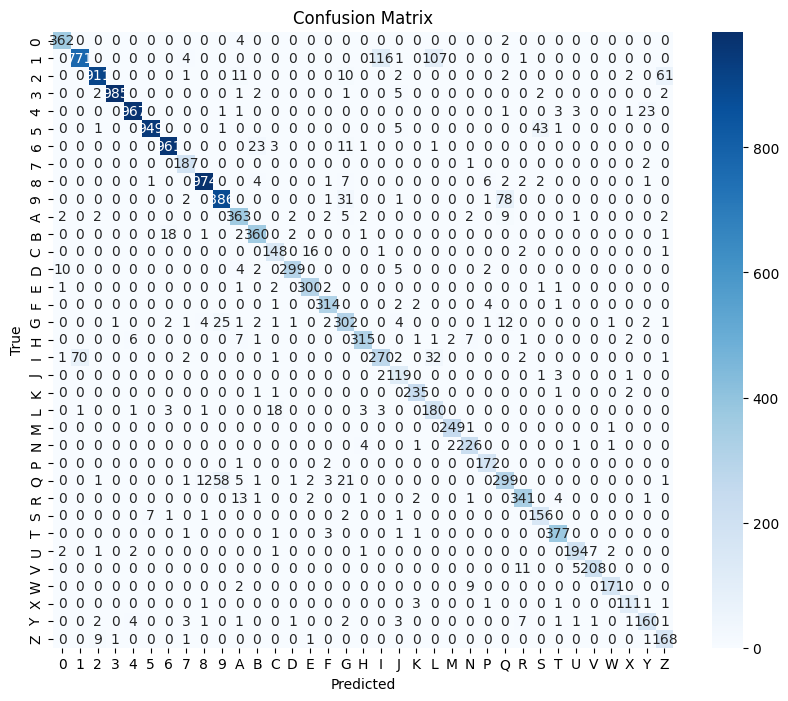

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
predictions = model.predict(val_X)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_Y, axis=1)
print(classification_report(true_classes, predicted_classes, target_names=LB.classes_))
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=LB.classes_, yticklabels=LB.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [28]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [29]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
BEWES


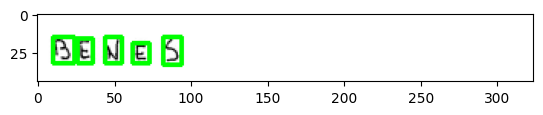

In [30]:
letter,image = get_letters("/root/.cache/kagglehub/datasets/landlord/handwriting-recognition/versions/1/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
LIL0U


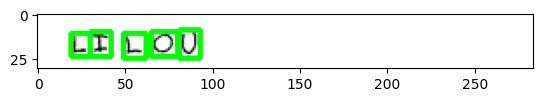

In [31]:
letter,image = get_letters("/root/.cache/kagglehub/datasets/landlord/handwriting-recognition/versions/1/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
JAFFFUX


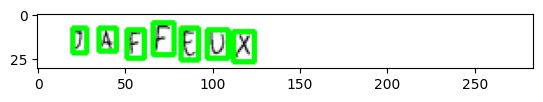

In [32]:
letter,image = get_letters("/root/.cache/kagglehub/datasets/landlord/handwriting-recognition/versions/1/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
RUPP


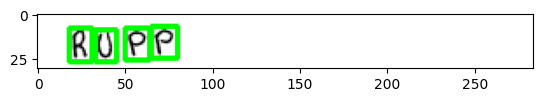

In [33]:
letter,image = get_letters("/root/.cache/kagglehub/datasets/landlord/handwriting-recognition/versions/1/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
VALENTJNE


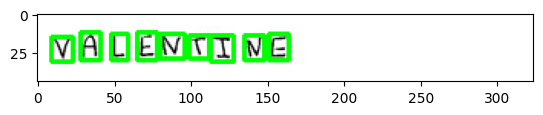

In [34]:
letter,image = get_letters("/root/.cache/kagglehub/datasets/landlord/handwriting-recognition/versions/1/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)